In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gc


In [2]:
cols=pd.read_csv("header.csv")
df = pd.read_csv("2018_ST4000DM000.csv", usecols=cols)

In [3]:
df.head(5)

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
0,2018-01-01,Z305B2QN,ST4000DM000,4000787030016,0,120.0,2346048.0,NaN,NaN,91.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,Z305DEMG,ST4000DM000,4000787030016,0,116.0,115775056.0,NaN,NaN,97.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,Z3023VGH,ST4000DM000,4000787030016,0,114.0,66649120.0,NaN,NaN,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,Z305DEMX,ST4000DM000,4000787030016,0,114.0,71636216.0,NaN,NaN,93.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,Z306WYZZ,ST4000DM000,4000787030016,0,115.0,98756616.0,NaN,NaN,95.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
cols_raw=filter(lambda x: 'raw' in x, list(df.columns))
cols_nomrmalized=filter(lambda x: 'normalized' in x, list(df.columns))

# df_raw = df[cols_common + cols_raw]
# df_norm = df[cols_common + cols_nomrmalized]

df_raw = df[cols_raw]
df_norm = df[cols_nomrmalized]

df_norm.sample(n=5)

,smart_1_normalized,smart_2_normalized,smart_3_normalized,smart_4_normalized,smart_5_normalized,smart_7_normalized,smart_8_normalized,smart_9_normalized,smart_10_normalized,smart_11_normalized,...,smart_223_normalized,smart_225_normalized,smart_240_normalized,smart_241_normalized,smart_242_normalized,smart_250_normalized,smart_251_normalized,smart_252_normalized,smart_254_normalized,smart_255_normalized
9112986,117.0,NaN,96.0,100.0,100.0,87.0,NaN,65.0,100.0,NaN,...,100.0,81.0,100.0,100.0,84.0,19.0,NaN,NaN,100.0,100.0
5182698,108.0,NaN,95.0,100.0,100.0,84.0,NaN,64.0,100.0,NaN,...,NaN,NaN,100.0,100.0,200.0,NaN,NaN,NaN,NaN,NaN
6490061,119.0,NaN,92.0,100.0,100.0,90.0,NaN,74.0,100.0,NaN,...,NaN,NaN,100.0,100.0,200.0,NaN,NaN,NaN,NaN,NaN
1177609,119.0,NaN,94.0,100.0,100.0,89.0,NaN,79.0,100.0,NaN,...,100.0,100.0,200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8601216,112.0,NaN,96.0,100.0,100.0,83.0,NaN,72.0,100.0,NaN,...,100.0,77.0,100.0,100.0,96.0,23.0,NaN,NaN,100.0,100.0


In [5]:
target = df[['failure']]
target.sample(n=5)

,failure
4754575,0
3370746,0
616490,0
5460202,0
1906266,0


In [6]:
df1 = pd.concat([df_norm, target], axis=1)
df1.sample(n=5)

,smart_1_normalized,smart_2_normalized,smart_3_normalized,smart_4_normalized,smart_5_normalized,smart_7_normalized,smart_8_normalized,smart_9_normalized,smart_10_normalized,smart_11_normalized,...,smart_225_normalized,smart_240_normalized,smart_241_normalized,smart_242_normalized,smart_250_normalized,smart_251_normalized,smart_252_normalized,smart_254_normalized,smart_255_normalized,failure
4937965,109.0,NaN,92.0,100.0,100.0,83.0,NaN,71.0,100.0,NaN,...,NaN,100.0,100.0,200.0,NaN,NaN,NaN,NaN,NaN,0
7742242,117.0,NaN,95.0,100.0,100.0,81.0,NaN,68.0,100.0,NaN,...,NaN,100.0,100.0,200.0,NaN,NaN,NaN,NaN,NaN,0
6807176,117.0,NaN,91.0,100.0,100.0,89.0,NaN,71.0,100.0,NaN,...,NaN,100.0,100.0,200.0,NaN,NaN,NaN,NaN,NaN,0
7762418,116.0,NaN,92.0,100.0,100.0,84.0,NaN,72.0,100.0,NaN,...,NaN,100.0,100.0,200.0,NaN,NaN,NaN,NaN,NaN,0
1608598,117.0,NaN,92.0,100.0,100.0,81.0,NaN,93.0,100.0,NaN,...,100.0,200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [7]:
X = df1.drop(['failure'], axis=1).values
y = df1['failure'].values

unique, counts = np.unique(y, return_counts=True)
print(np.asarray((unique, counts)).T)

[[      0 9991781]
 [      1     581]]


In [8]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, mean_absolute_error, accuracy_score, classification_report

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=123)

In [17]:
eval_set = [(x_test,y_test)]
clf = XGBClassifier(objective ='reg:logistic', 
                             max_depth = 3,
                             silent = 1,
                             learning_rate = 0.3,
                             n_estimators = 200)

#eval_metric = ["auc","error"]
eval_metric = ["logloss"]
%time clf.fit(x_train, y_train, early_stopping_rounds=10, eval_metric=eval_metric, eval_set=eval_set, verbose=True)
#%time model.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=True)

y_pred = clf.predict(x_test)

print("Classification Report: \n", classification_report(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy",accuracy)

[0]	validation_0-logloss:0.478617
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.275126
[2]	validation_0-logloss:0.211761
[3]	validation_0-logloss:0.137624
[4]	validation_0-logloss:0.106981
[5]	validation_0-logloss:0.070107
[6]	validation_0-logloss:0.06053
[7]	validation_0-logloss:0.041929
[8]	validation_0-logloss:0.031383
[9]	validation_0-logloss:0.021958
[10]	validation_0-logloss:0.016242
[11]	validation_0-logloss:0.012987
[12]	validation_0-logloss:0.00882
[13]	validation_0-logloss:0.007008
[14]	validation_0-logloss:0.005394
[15]	validation_0-logloss:0.004173
[16]	validation_0-logloss:0.002946
[17]	validation_0-logloss:0.002295
[18]	validation_0-logloss:0.001998
[19]	validation_0-logloss:0.001405
[20]	validation_0-logloss:0.001316
[21]	validation_0-logloss:0.000974
[22]	validation_0-logloss:0.00088
[23]	validation_0-logloss:0.000843
[24]	validation_0-logloss:0.000695
[25]	validation_0-logloss:0.000635
[26]	validation_0-logloss:0.00061
[

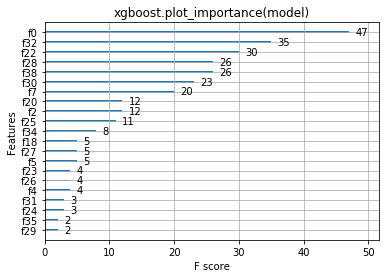

In [18]:
import seaborn as sns

xgb.plot_importance(clf)
plt.title("xgboost.plot_importance(model)")
plt.show()

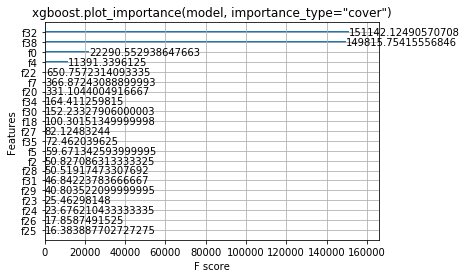

In [19]:
xgb.plot_importance(clf, importance_type="cover")
plt.title('xgboost.plot_importance(model, importance_type="cover")')
plt.show()